<h1><center>Module 16 Lesson 9 Challenge: sentiment analysis with Naive bayes and Cross Validation</center></h1>

##### Import packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

##### Select Data

In [37]:
sms_raw = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', delimiter= '\t', header=None)

In [38]:
sms_raw.columns = ['message', 'review']

In [39]:
sms_raw.head()

,message,review
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


##### Lets first find out what words are in here

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

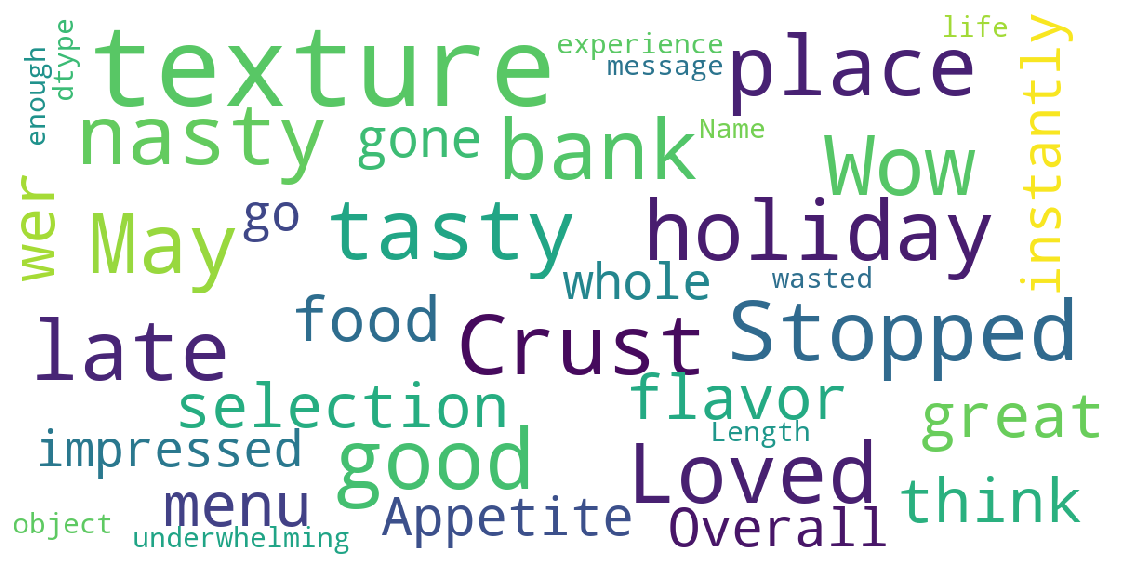

In [32]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(sms_raw["message"])

>I am going to guess that some good words based off of the above word cloud that we could use for negative reviews would 'nasty', 'late', 'underwhelming', 'wasted', 'bad', 'not', 'horrible', 'terrible'.

In [85]:
keywords = ['nasty', 'late', 'underwhelming', 'wasted', 'bad', 'not', 'horrible', 'terrible', 'overall', 'sick', 'dirty']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [51]:
sms_raw.head()

,message,review,nasty,late,underwhelming,wasted,bad,not,horrible,terrible
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False,True,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,False,False,True,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False


##### Now change the review to a True/False value

In [42]:
sms_raw['review'] = (sms_raw['review'] == 0)

In [43]:
sms_raw.head()

,message,review,nasty,late,underwhelming,wasted,bad,not,horrible,terrible
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False,True,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,False,False,True,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False


>As discussed in Naive Bayes, we want to ensure that our varaibles are indenpendent of eachother. To do this we can use a correlation heatmap.

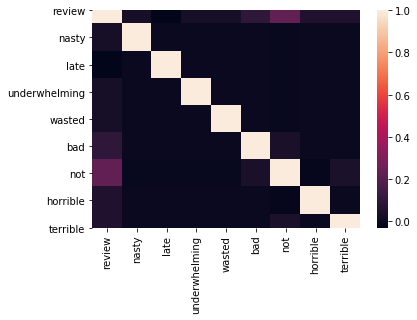

In [44]:
sns.heatmap(sms_raw.corr())

>Looks like our variables are all pretty independent of eachother! This is great news.

##### Set data and target variables

In [86]:
data = sms_raw[keywords]
target = sms_raw['review']

In [87]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 412


##### See how the model did with a confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[484,  16],
       [396, 104]])

In [89]:
sms_raw['review'].value_counts()

True     500
False    500
Name: review, dtype: int64

##### Test model by creating different holdout groups

In [92]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.56
Testing on Sample: 0.588


In [94]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.59, 0.56, 0.6 , 0.54, 0.61, 0.6 , 0.61, 0.58, 0.58, 0.58])